# HW 6 : FOURIER TRANSFORM 
## (IMAGE/DATA COMPRESSION)
1. From web:
 download the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
 using Fourier transform to process the image and figure out how to compress the data.
 
3. Compare it with the size which you obtained via plt.savefig()

2. Choose your own data or online data to play with DFT, IDFT and fitting with different functions.

In [3]:
# Ronaldo Ascano
# due 10.10.18

import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

data = np.fromstring(the_page, dtype="float", sep=' ')
data = np.reshape(data,[501,501])

print (data[:5,:5])
print(np.shape(data))

plt.imshow(data, origin="lower")
plt.colorbar()

# saves image in my desktop
plt.savefig('/Users/ronascano/Desktop/image.png', format='png', bbox_inches='tight')

[[1.         0.99980001 0.99920011 0.99820054 0.99680171]
 [0.99980001 0.99960003 0.99900017 0.99800067 0.99660193]
 [0.99920011 0.99900017 0.99840043 0.99740113 0.99600267]
 [0.99820054 0.99800067 0.99740113 0.99640216 0.99500417]
 [0.99680171 0.99660193 0.99600267 0.99500417 0.99360682]]
(501, 501)


### Stored in my desktop this image's file size is 52 KB.

In [4]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or file-like object
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, remember 

In [15]:
import timeit

In [4]:
%timeit np.fft.fft2(data)
%timeit np.fft.ifft2(data)

3.61 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.85 ms ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


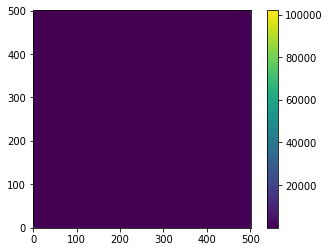

In [9]:
# USING FFT
processed_data = np.fft.fft2(data)               # returns ndarray containing complex values
newdata = np.absolute(processed_data)            # takes absolute values of elements in array

# displays the plot for compressed data
plt.imshow(newdata, origin='lower')
plt.colorbar()

plt.savefig('/Users/ronascano/Desktop/image-fft.png', format='png', bbox_inches='tight')

### After processing the image using fourier transform, its file size is only 5 KB.
### Also it lost most of its colors.

[[19 20 12 ... 62  4 52]
 [70 91 66 ... 44 78 90]
 [ 8 70 20 ... 28 81 18]
 ...
 [ 1 16 13 ... 11 33 94]
 [82 97 14 ... 61 75 69]
 [72 28 95 ... 87 36 66]]


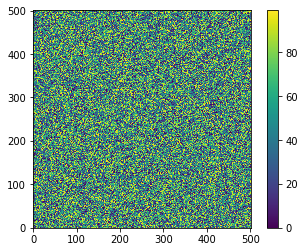

In [40]:
# create data

# creates an array with random values between 0-99 inclusive
random_501x501_array = np.random.randint(100,size=(501,501))

print(random_501x501_array)

plt.imshow(random_501x501_array, origin='lower')
plt.colorbar()

plt.savefig('/Users/ronascano/Desktop/random.png', format='png', bbox_inches='tight')

In [23]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

In [39]:
# now run image data through np.fft2

fft_data = np.fft.fft2(random_501x501_array)
compressed_data = np.absolute(fft_data)

plt.imshow(compressed_data)
plt.colorbar()

plt.savefig('/Users/ronascano/Desktop/random-fft.png', format='png', bbox_inches='tight')

NameError: name 'random_501x501_array' is not defined

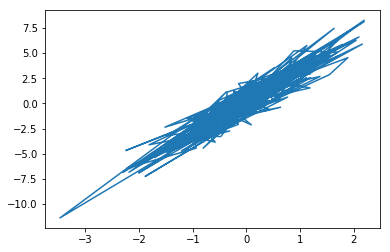

In [64]:
x = np.random.normal(size=250)
y = x * 3 + np.random.normal(size=250)

data1 = np.fromfile
plt.plot(x,y)

In [38]:
from PIL import Image
im = Image.open("/Users/ronascano/miniconda3/symbolic-image-computer-hackers-data-security-computer-crime-internet-CPHHH3.jpg")
#im.show()

#print(list(np.asarray(im)))


def jpg_image_to_array(image_path):
  """
  Loads JPEG image into 3D Numpy array of shape 
  (width, height, channels)
  """
  with Image.open(image_path) as image:         
    image_arr = np.frombuffer(image.tobytes(), dtype=np.uint8)
    image_arr = image_arr.reshape((image.size[1], image.size[0], 3))                                   
    return image_arr


In [12]:
jpg_image_to_array('/Users/ronascano/miniconda3/symbolic-image-computer-hackers-data-security-computer-crime-internet-CPHHH3.jpg')

array([[[  8, 240,  17],
        [  0, 237,   0],
        [  0, 249,   4],
        ...,
        [  5,   0,   0],
        [  5,   0,   0],
        [  5,   0,   0]],

       [[  8, 240,  17],
        [  0, 237,   0],
        [  0, 249,   4],
        ...,
        [  5,   0,   0],
        [  5,   0,   0],
        [  5,   0,   0]],

       [[  7, 239,  16],
        [  0, 238,   0],
        [  0, 251,   6],
        ...,
        [  5,   0,   0],
        [  5,   0,   0],
        [  5,   0,   0]],

       ...,

       [[ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72],
        ...,
        [ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72]],

       [[ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72],
        ...,
        [ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72]],

       [[ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72],
        ...,
        [ 50,  51,  72],
        [ 50,  51,  72],
        [ 50,  51,  72]]

In [71]:
help(np.fromfile)

Help on built-in function fromfile in module numpy.core.multiarray:

fromfile(...)
    fromfile(file, dtype=float, count=-1, sep='')
    
    Construct an array from data in a text or binary file.
    
    A highly efficient way of reading binary data with a known data-type,
    as well as parsing simply formatted text files.  Data written using the
    `tofile` method can be read using this function.
    
    Parameters
    ----------
    file : file or str
        Open file object or filename.
    dtype : data-type
        Data type of the returned array.
        For binary files, it is used to determine the size and byte-order
        of the items in the file.
    count : int
        Number of items to read. ``-1`` means all items (i.e., the complete
        file).
    sep : str
        Separator between items if file is a text file.
        Empty ("") separator means the file should be treated as binary.
        Spaces (" ") in the separator match zero or more whitespace characters

1015
[[1.86103463e+08 2.57541596e+07 2.57541596e+07 ... 1.36943320e+06
  2.08835705e+05 3.18443764e+05]
 [1.55401017e+06 2.56119933e+05 1.64896579e+05 ... 5.00306197e+05
  3.41149591e+05 4.47352934e+05]
 [5.06936208e+05 2.34946532e+05 2.72262004e+05 ... 2.14489718e+05
  3.96649497e+05 2.42379824e+05]
 ...
 [5.02496749e+05 5.80094321e+05 5.81063477e+05 ... 3.94329747e+05
  4.32570329e+05 2.45366298e+05]
 [9.26249546e+05 6.39728583e+05 4.65488470e+05 ... 8.57885777e+05
  2.45219430e+05 3.93918787e+05]
 [2.88535535e+05 2.56569220e+05 3.97258256e+05 ... 3.75319394e+07
  9.62660596e+06 7.94979016e+06]]


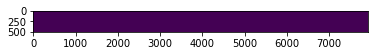

In [37]:
image_data = np.fft.fftn(jpg_image_to_array
     ('/Users/ronascano/miniconda3/symbolic-image-computer-hackers-data-security-computer-crime-internet-CPHHH3.jpg'))

image_data_fft = np.absolute(image_data)
image_data_fft_reshaped = np.reshape(image_data_fft,[500,7917])

print(len(image_data_fft))
print(image_data_fft_reshaped)

plt.imshow
plt.imshow(image_data_fft_reshaped)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi

df = pd.read_csv('/Users/ronascano/Downloads/multiTimeline.csv')
print(df)
x = df.columns('Time')
y = df.columns('Taylor Swift: (United States)')

# DFT
def dft( y ):
    N = len( y )
    c = np.zeros( N , complex ) 
    for k in range( N ):
        for n in range( N ):
            c[k] += y[n] * exp( -1j * (2.0*pi*k*n) / N )
    return c


#Inverse DFT
def idft( c ):
    N = len( c )
    y0 = np.zeros( N , complex )
    for k in range( N ):
        for n in range( N ):
            y0[k] += c[n] * exp(1j * ( 2.0 * pi * k *n) / N )
    return y0

c = DFT(y)
y1 = IFT(c).real/len(y)

# graph
plt.figure(figsize=(15,15))
plt.plot(x,y,'--d',label='Data')
plt.plot(x,y1,'r',label='Inverse Fourier Transform')
plt.ylabel('# of Google Searches')
plt.xlabel('Time')
plt.legend()
plt.title("Google Trend for Kim Kardashian in 2018")
plt.show()


#fig, mag = plt.subplots(figsize = (15,15))
#mag.plot(np.abs(c), label='Magnitude')
#plt.title("Magnitude of Fourier Coefficients")
#plt.show()

                                                    Category: All categories
Time          Taylor Swift: (United States)  Kim Kardashian: (United States)
2018-10-03T14 4                                                            8
2018-10-03T15 5                                                            9
2018-10-03T16 5                                                            9
2018-10-03T17 5                                                            9
2018-10-03T18 6                                                           11
2018-10-03T19 5                                                           11
2018-10-03T20 5                                                           12
2018-10-03T21 5                                                           14
2018-10-03T22 5                                                           16
2018-10-03T23 5                                                           16
2018-10-04T00 5                                                           16

TypeError: 'Index' object is not callable

In [62]:
help(df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ra